# Project 4 :Abalone 

In [85]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [214]:
#loading the dataset
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [215]:
df.shape #shows 4177 rows and 9 columns (attributes including target column)

(4177, 9)

In [216]:
df.head() #shows first five data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [217]:
df.sample(3) #show 3 random samples information of dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4125,I,0.54,0.415,0.135,0.7090,0.3195,0.1740,0.1850,9
2159,F,0.64,0.510,0.200,1.3905,0.6100,0.3315,0.4100,12
1199,F,0.72,0.580,0.195,2.1030,1.0265,0.4800,0.5375,10


In [218]:
df.tail() #shows last 5 data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [219]:
df.dtypes #shows the data types of each variables so one is categorical others are float/int types

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [220]:
df.isnull().sum() #no missing values are present so need of applying any imputation technique

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

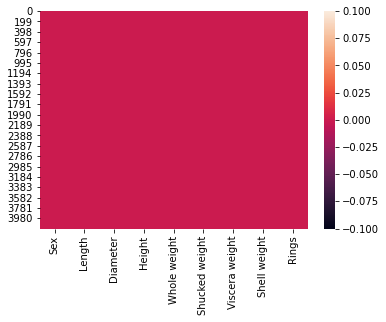

In [221]:
sns.heatmap(df.isnull()) #visual represenation that there is no null values present. if thers a null values then there would have been diff. colour shades in between 

In [222]:
df.iloc[:,0] #

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [223]:
lencoder=LabelEncoder()  #applied label encoder converting categorical value to numerical value for analysis As Machine learning only understands numerical values.
df['Sex']=lencoder.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


UNIVARIANTE ANALYSIS

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

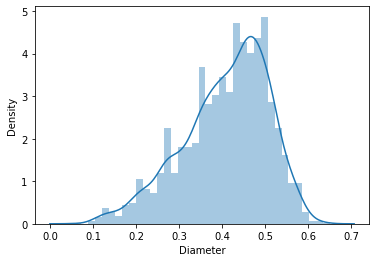

In [224]:
sns.distplot(df['Diameter']) #univariate analysis using distplot to see whether they are normally distributed or skewness present

<AxesSubplot:xlabel='Height', ylabel='Density'>

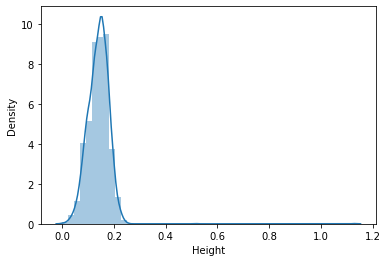

In [225]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

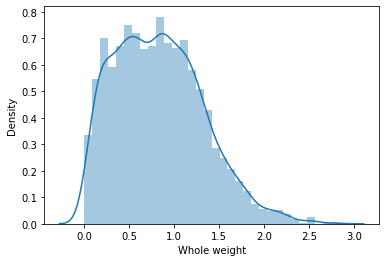

In [226]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

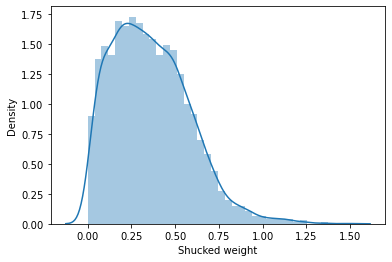

In [227]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

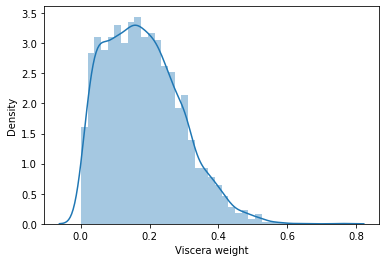

In [228]:
sns.distplot(df['Viscera weight']) 

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

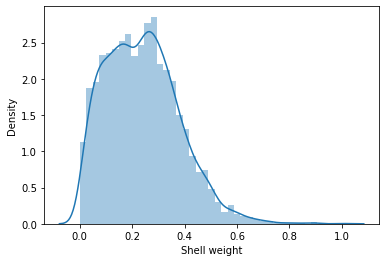

In [229]:
sns.distplot(df['Shell weight'])  

<AxesSubplot:xlabel='Rings', ylabel='Density'>

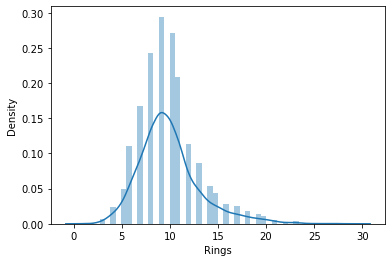

In [230]:
sns.distplot(df['Rings']) 

In [231]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [232]:
#Categorical Analysis
obj = ['Sex']
for column in df[obj]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

SEX :  3
0    1307
1    1342
2    1528
Name: Sex, dtype: int64




This show there are 1307 females,1528 males and 1342 infant species.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

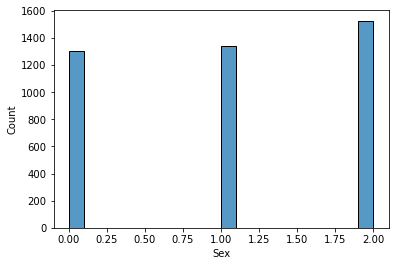

In [233]:
sns.histplot(df['Sex'],bins=20) #shows visual representation of male/female/infant counts. X axis is sex and y axis is counts.

<AxesSubplot:xlabel='Rings', ylabel='Count'>

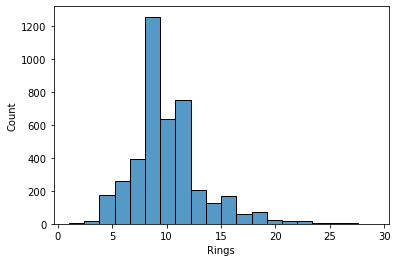

In [234]:
sns.histplot(df['Rings'],bins=20) #here rings gave the age in years which means age 8 yrs approx hold maximum counts that is 1200 

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

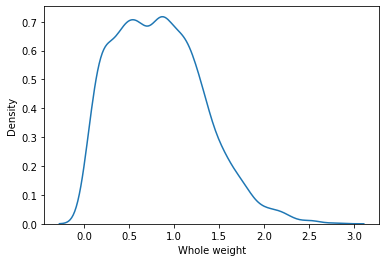

In [235]:
sns.kdeplot(df['Whole weight']) #univariate analysis

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

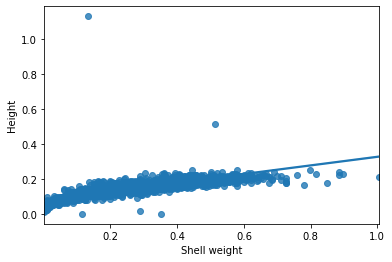

In [236]:
#Bivariate Analysis
sns.regplot(x="Shell weight",y="Height",data=df) #As shell weight increases,the height is not dat incraesing,remaing almost constant.

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

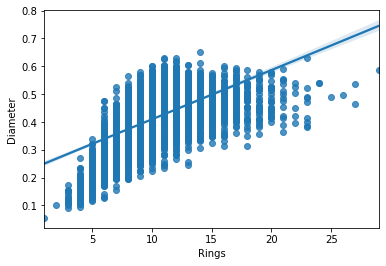

In [237]:
#Bivariate Analysis
sns.regplot(x="Rings",y="Diameter",data=df) #As rings(age) incraeses thus diameter of the shell also increases

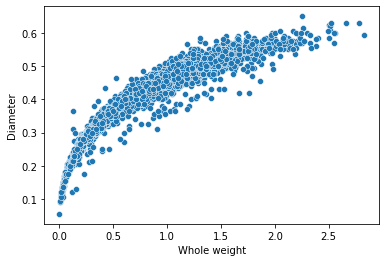

In [238]:
#Bivariate Analysis as we are taking two columns to analyse using scatter plot
sns.scatterplot(x="Whole weight",y="Diameter",data=df); #as whole weight increases ,the diameter of the species also increases.
                                                        

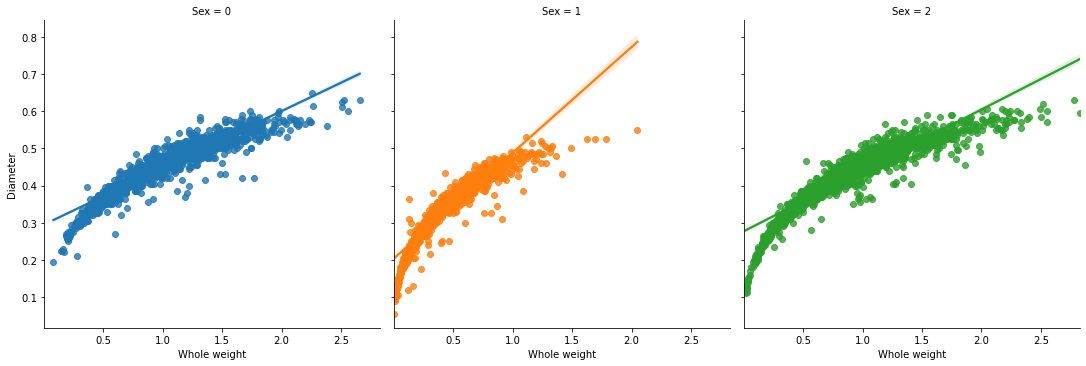

In [239]:
sns.lmplot(x="Whole weight",y="Diameter",hue='Sex',col='Sex',data=df) #shows Male,Females & Infants whole weight vs diametet are positivly correlated
                                                                         # Able to disntinguish better between three categories.

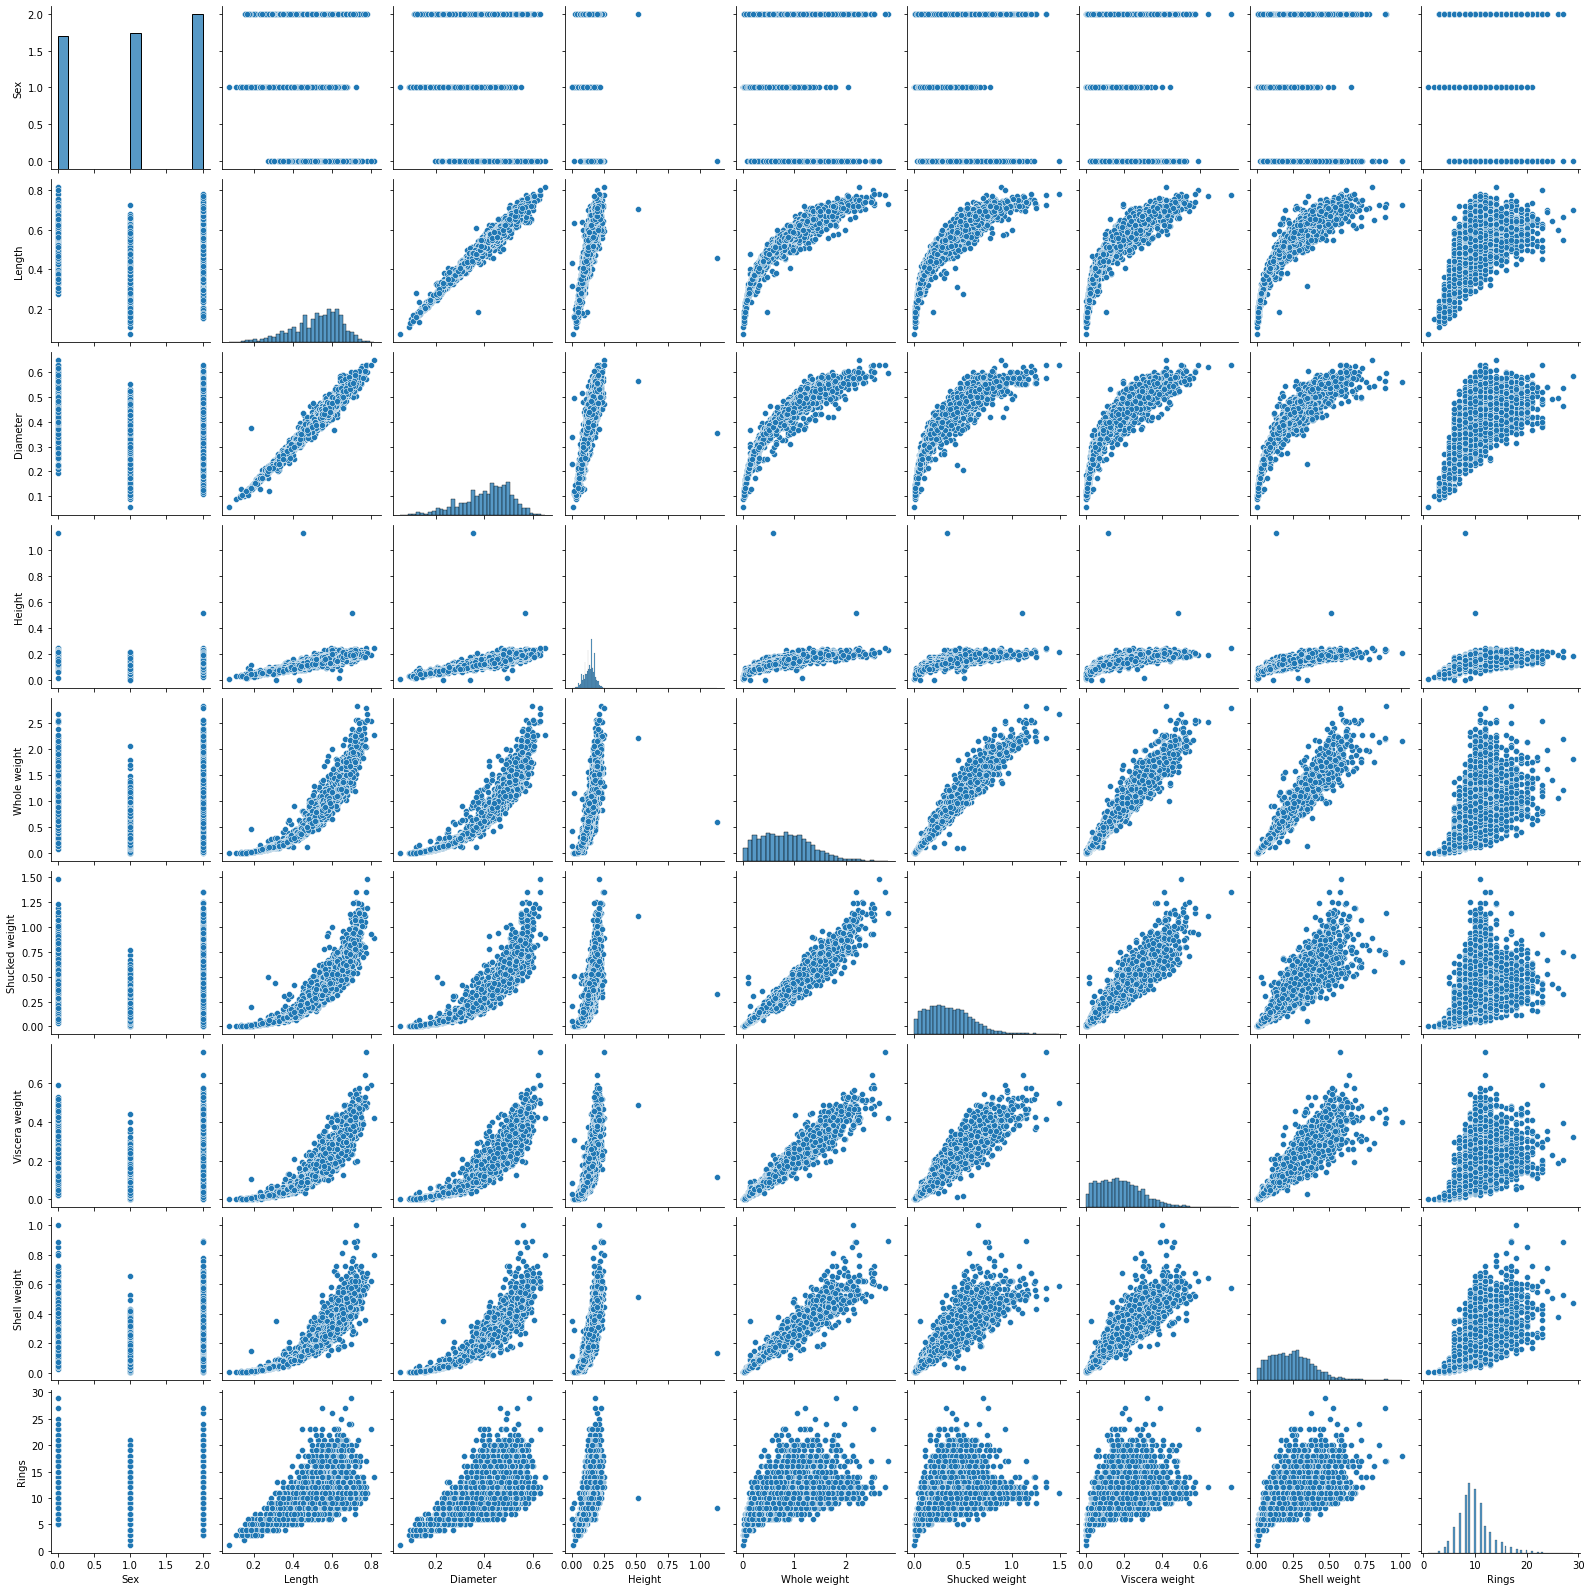

In [240]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

In [241]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [242]:
#checking skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

We can see some of the data are skewed like Height,Rings

In [243]:
#removing the skewness
import numpy as np
df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

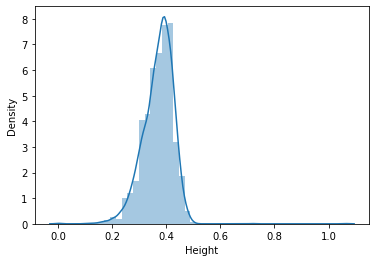

In [244]:
sns.distplot(df['Height'])
# checking via graph whether skewness is removed or not. 
#It shows skewness little removed now and now its little bit normally distributed.

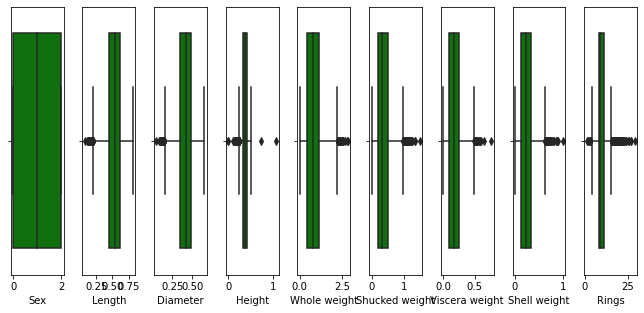

In [245]:
#checking ouliers by visual representation
import matplotlib.pyplot as plt
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

In [246]:
#detecting outliers
from scipy.stats import zscore
dfzcore=np.abs(zscore(df))
print(np.where(dfzcore>3)) #those coeffiecients value  greater than 3 are displayed as outliers.

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [247]:
#Removing outliers
dfnew=df[(dfzcore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (4019, 9)


In [248]:
loss_percent=(4177-4019)/4177*100
print(loss_percent,'%')

3.782619104620541 %


Thus we can compare that earlier the shape was 4177 and now after removal of outliers its is 4019 ,
so 158 ouliers have been removed.So data loss is around 3% approx which is acceptable. 

In [249]:
#checking correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

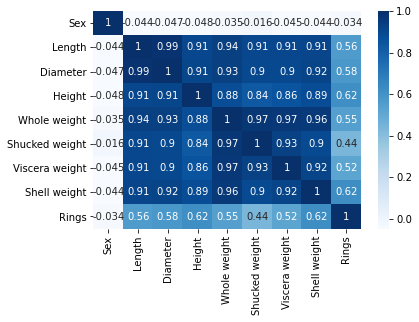

In [250]:
sns.heatmap(df.corr(),cmap="Blues",annot= True)

In [251]:
Observation: 
1.Length and diameter are higly correlated about 99%
2.Whole weight and shucked weight are higly correlated about 93%
3.Shell weight and viscera are higly correlated around 92%
This shows the columns shows multicollinearity which needs to be addressed.

SyntaxError: invalid syntax (<ipython-input-251-7b7c7fdd6f77>, line 1)

In [252]:
#Addressing MULTICOLLINEARITY VIA VARIANCE INFLATION FACTOR
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [254]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [255]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [256]:
def vif_cal():
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [257]:
vif_cal()

         Features  VIF Factor
0             Sex    2.632493
1          Length  802.340579
2        Diameter  763.963727
3          Height  154.948351
4    Whole weight  441.891678
5  Shucked weight  110.275122
6  Viscera weight   65.499021
7    Shell weight   92.744708


In [258]:
df.drop(["Length","Shucked weight"],axis=1,inplace=True)

In [259]:
x=df.iloc[:,:-1] #validating again whether columns dropped or not.
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [260]:
vif_cal()
#again validating vif and it shows certain vif. Though its showing vif values,as we have already dropped 2 varible ,
#we cant dropped again as we are left with only 6 variables. 
#thus this is a feature selection,we are selecting variable for model and here 6 variables are selected for model.

         Features  VIF Factor
0             Sex    2.623184
1        Diameter  207.507326
2          Height  131.432133
3    Whole weight  140.572357
4  Viscera weight   60.762342
5    Shell weight   58.911776


In [261]:
x.shape

(4019, 6)

In [262]:
y.shape

(4019,)

In [263]:
#Normalization of dataset
#as we can see that certain columns are not normalise like sex columns,columns having three decimals,four decimals places.so
#these are not scaled properly.All should be in standard format. 
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [264]:
#invert difference
inverted=scale.inverse_transform(x)
print(inverted)

[[2.         0.365      0.3082207  0.514      0.101      0.15      ]
 [2.         0.265      0.3        0.2255     0.0485     0.07      ]
 [0.         0.42       0.36742346 0.677      0.1415     0.21      ]
 ...
 [2.         0.475      0.45276926 1.176      0.2875     0.308     ]
 [0.         0.485      0.38729833 1.0945     0.261      0.296     ]
 [2.         0.555      0.44158804 1.9485     0.3765     0.495     ]]


In [265]:
dx=pd.DataFrame(inverted)
dx

,0,1,2,3,4,5
0,2.0,0.365,0.308221,0.5140,0.1010,0.1500
1,2.0,0.265,0.300000,0.2255,0.0485,0.0700
2,0.0,0.420,0.367423,0.6770,0.1415,0.2100
3,2.0,0.365,0.353553,0.5160,0.1140,0.1550
4,1.0,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4014,0.0,0.450,0.406202,0.8870,0.2390,0.2490
4015,2.0,0.440,0.367423,0.9660,0.2145,0.2605
4016,2.0,0.475,0.452769,1.1760,0.2875,0.3080
4017,0.0,0.485,0.387298,1.0945,0.2610,0.2960


In [266]:
#Training the model
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=55)

In [267]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.01490985,  0.33486112,  1.09119146, -2.88953957,  0.08435652,
        3.19728531])

In [268]:
#making dataframe :more distinguisable:- features with its coefficient value
features=['Sex ','Diameter','Height','Whole weight','Viscera weight','Shell weight']
list(zip(features,lr.coef_))  
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.014910
Diameter,0.334861
Height,1.091191
Whole weight,-2.889540
Viscera weight,0.084357
Shell weight,3.197285


In [269]:
lr.intercept_

9.78147748269469

In [270]:
lr.score(x_train,y_train)

0.47083360466255675

In [271]:
pred=lr.predict(x_train)
pred

array([12.35886159, 11.60987272,  9.15043539, ...,  8.29432796,
       10.63098516, 12.77724834])

In [272]:
print("Predicted values",pred)

Predicted values [12.35886159 11.60987272  9.15043539 ...  8.29432796 10.63098516
 12.77724834]


In [273]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,12.358862
1,11.609873
2,9.150435
3,7.898368
4,8.027559
...,...
2687,9.414336
2688,10.854564
2689,8.294328
2690,10.630985


In [274]:
lr.score(x_test,y_test)

0.4157256050479684

In [275]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error :",mean_squared_error(y_test,pred))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred)))
print("R2_Score",r2_score(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [1327, 2692]